# Fetching + model buildeing

In [1]:
cities = {
    'barcelona':'Barcelona', 
    'madrid':'Madrid',
    'shenzhen': 'Shenzhen',
    'helsinki': 'Helsinki',
    'melbourne': 'Melbourne',
    'hong_kong': 'Hong Kong'
}

In [4]:
!pip install contextily -q

100%|██████████| 6/6 [10:05<00:00, 100.97s/it]


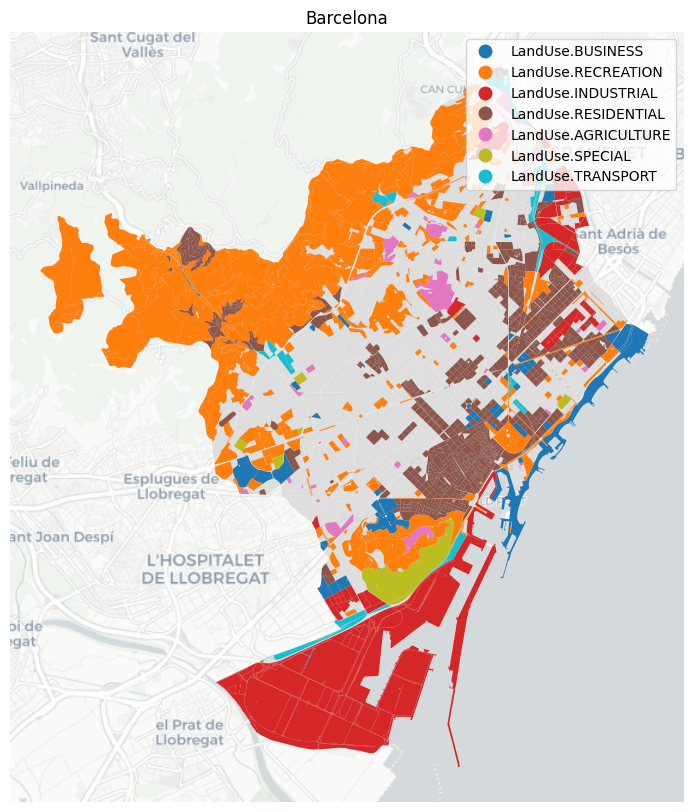

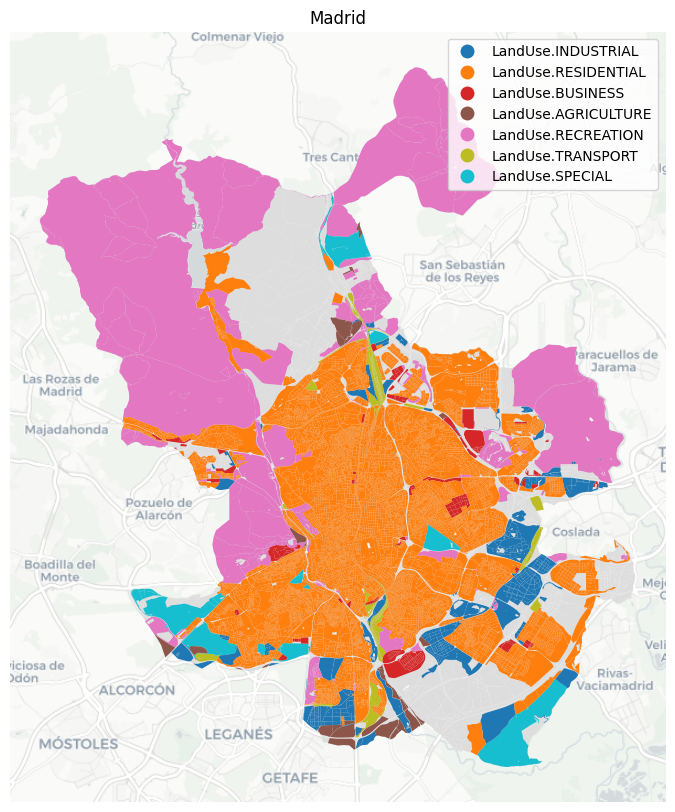

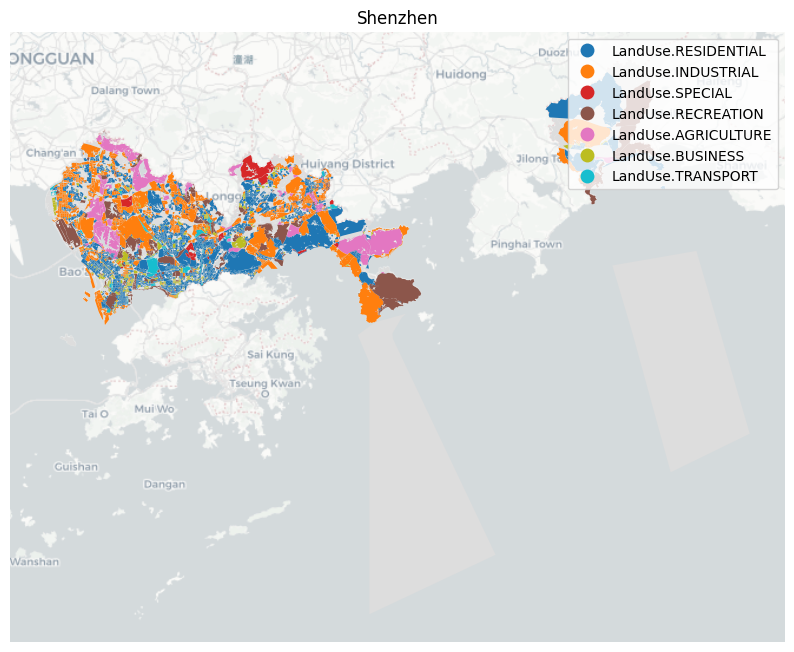

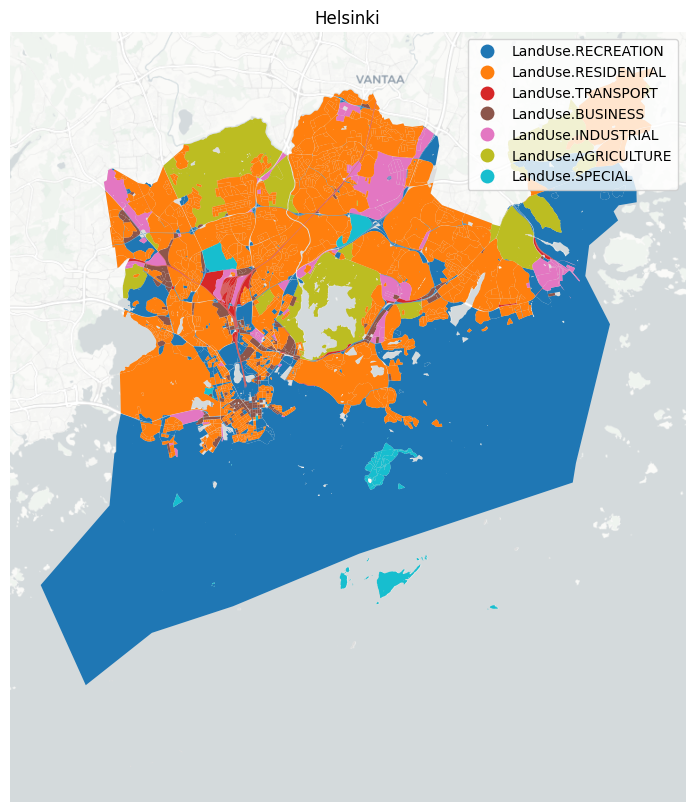

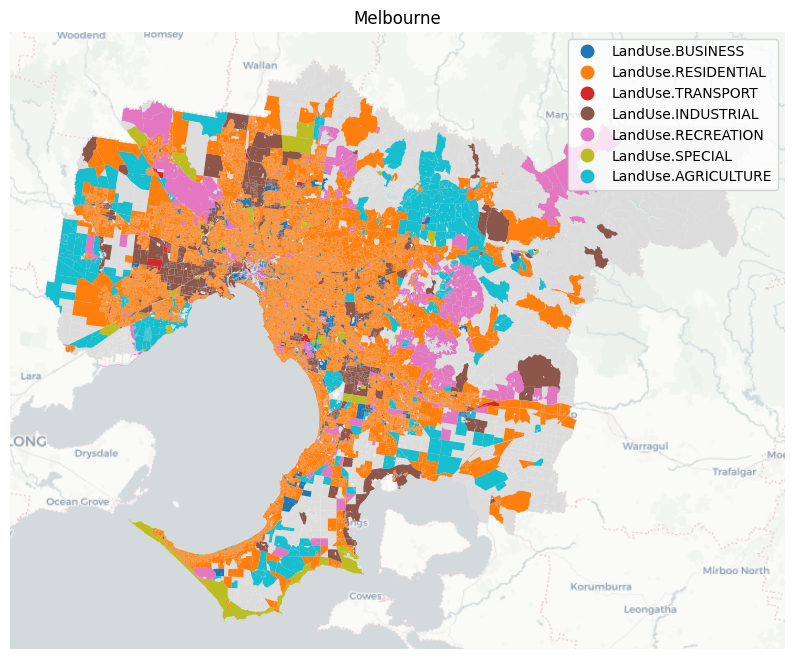

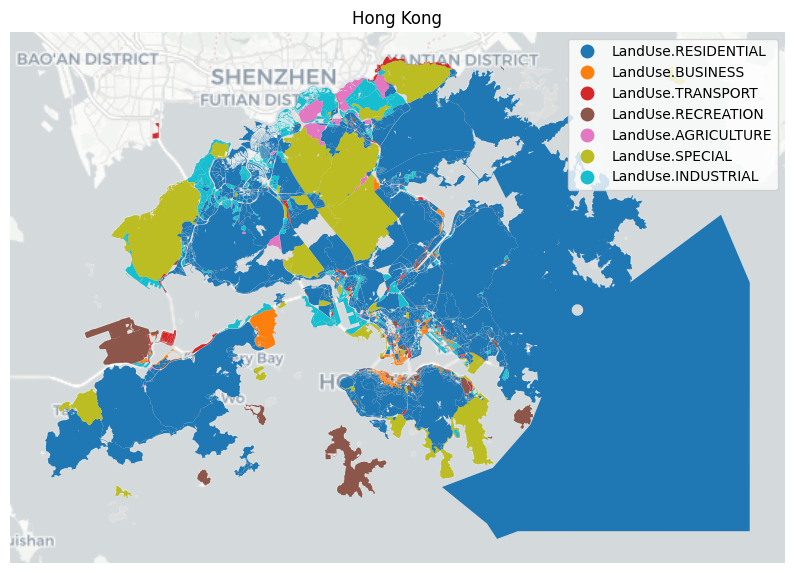

In [5]:
from common import get_blocks_gdf
from blocksnet.config import log_config
from tqdm import tqdm
import geopandas as gpd
import contextily

log_config.set_logger_level('ERROR')

def plot_blocks(blocks_gdf : gpd.GeoDataFrame, city_name : str):
    blocks_gdf = blocks_gdf.to_crs(3857)
    ax = blocks_gdf.plot(color='#ddd', figsize=(10,10))
    blocks_gdf.plot('land_use', legend=True, ax=ax)
    ax.set_axis_off()
    ax.set_title(city_name)
    contextily.add_basemap(ax, attribution=False, source=contextily.providers.CartoDB.Positron)

for file_name, city_name in tqdm(cities.items()):

    blocks_gdf = get_blocks_gdf(city_name)
    blocks_gdf.to_pickle(f'./../data/{file_name}.pickle')

    plot_blocks(blocks_gdf, city_name)